<a href="https://ibb.co/93PP6VM"><img src="https://i.ibb.co/BKkkbr1/lab3-protokol-var20.png" alt="lab3-protokol-var20" border="0"></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics.pairwise import euclidean_distances
import pandas as pd
from sklearn.model_selection import train_test_split

from warnings import simplefilter
simplefilter(action='ignore', category = FutureWarning)

# 1. Представити початкові дані графічно 

In [2]:
#make_blobs dataset2 creating
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0,0.0],[2.0,2.0]]
cluster_std = [2.0, 1.0]
X2, y2 = make_blobs(n_samples=[n_samples_1, n_samples_2],
                 centers = centers,
                 cluster_std = cluster_std,
                  random_state = 0, shuffle = False)

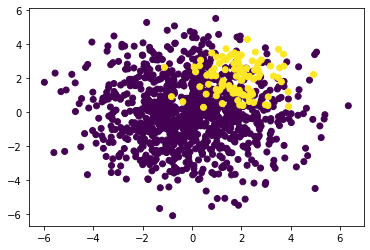

In [3]:
#make_blobs dataset2 visualization
plt.scatter(X2[:, 0], X2[:, 1], c=y2)
plt.show()

In [4]:
#dataset1 creating
np.random.seed(0)
X1=np.random.randn(300,2)
y1=np.logical_xor(X1[:,0]>0, X1[:,1]>0)

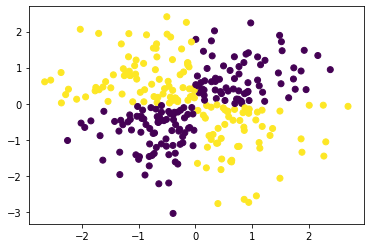

In [5]:
#dataset1 visualisation
plt.scatter(X1[:, 0], X1[:, 1], c=y1)
plt.show()

# 2. Побудувати модель кластеризації

In [6]:
#dataset1
af1 = AffinityPropagation().fit(X1)
#dataset2
af2= AffinityPropagation().fit(X2)

# 3. Виконати кластеризацію даних на основі моделі
# 4. Представити розбиття на кластери графічно
# 5. Розрахувати додаткові результати кластеризації

In [7]:
#function for metrics printing and plots building
def metrics_and_plots(af, X, y_true):
    print(af.get_params())
    
    cluster_centers_indices = af.cluster_centers_indices_
    labels = af.labels_

    n_clusters_ = len(cluster_centers_indices)
    
    print('Estimated number of clusters: %d' % n_clusters_)
    print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y_true, labels))
    print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y_true, labels))
    print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))
    
    plt.close('all')
    plt.figure(1)
    plt.clf()

    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clusters_), colors):
        class_members = labels == k
        cluster_center = X[cluster_centers_indices[k]]
        plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
        plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=14)
        for x in X[class_members]:
            plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()

{'affinity': 'euclidean', 'convergence_iter': 15, 'copy': True, 'damping': 0.5, 'max_iter': 200, 'preference': None, 'verbose': False}
Estimated number of clusters: 20
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.231
Silhouette Coefficient: 0.481


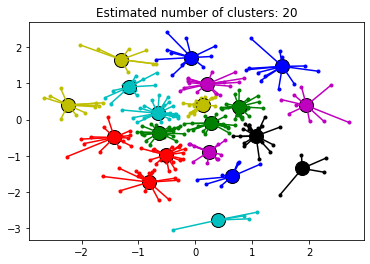

{'affinity': 'euclidean', 'convergence_iter': 15, 'copy': True, 'damping': 0.5, 'max_iter': 200, 'preference': None, 'verbose': False}
Estimated number of clusters: 41
Adjusted Rand Index: 0.003
Adjusted Mutual Information: 0.061
Silhouette Coefficient: 0.494


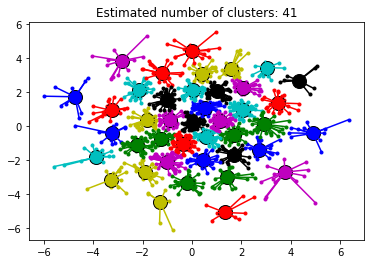

In [8]:
#for dataset1
metrics_and_plots(af1, X1, y1)
#for dataset2
metrics_and_plots(af2, X2, y2)

# 6. Побудувати декілька альтернативних моделей
# 7. Для кожної альтернативної моделі розрахувати метрики якості кластеризації згідно з варіантом

# Побудуємо моделі з альтернативним параметром preference

Теоретичні відомості про параметр Preference:

З сайту habr.com:

Preference - один з найголовніших параметрів Affinity Propagation.
В AP вместо наперёд заданного количества кластеров используется параметр «самоподобия» s(k,k) ; чем меньше s(k,k) , тем крупнее кластеры. Существуют эвристики для автоматической подстройки значения этого параметра: используйте медиану по всем  s(i,k)  для большего числа кластеров; 25 перцентиль или даже минимум по  s(i,k)  — для меньшего (всё равно придётся подгонять, ха-ха). При слишком маленьком или слишком большом значении «самоподобия» алгоритм и вовсе не выдаст каких-то полезных результатов.

В качестве s(i,k) само собой напрашивается использовать отрицательное евклидово расстояние между i и j, но вас никто не ограничивает в выборе. Даже в случае датасета из векторов действительных чисел можно перепробовать много интересного. 
 
З сайту stackoverflow:

Affinity Propagation does not use distances, but requires you to specify a similarity. It uses negative squared Euclidean distances by default to compute the similarity matrix. If you set the input preference to the minimal Euclidean distance, you get a positive value, while all similarities are negative. So this will typically result in as many clusters as you have samples (note: the higher the input preference, the more clusters). It's advised to set the input preference to the minimal negative squared distance, i.e. -1 times the square of the largest distance in the data set. This will give you a much smaller number of clusters, but not necessarily one single cluster.

In [9]:
#custom preference parameter choise
preference1 = -1 * np.amax(euclidean_distances(X1)) ** 2
preference2 = -1 * np.amax(euclidean_distances(X2)) ** 1.3

{'affinity': 'euclidean', 'convergence_iter': 15, 'copy': True, 'damping': 0.5, 'max_iter': 500, 'preference': -31.92312307756652, 'verbose': False}
Estimated number of clusters: 7
Adjusted Rand Index: 0.104
Adjusted Mutual Information: 0.196
Silhouette Coefficient: 0.510


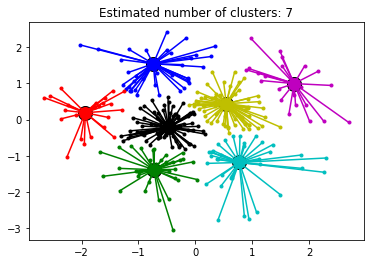

{'affinity': 'euclidean', 'convergence_iter': 15, 'copy': True, 'damping': 0.5, 'max_iter': 1000, 'preference': -27.05255915810875, 'verbose': False}
Estimated number of clusters: 27
Adjusted Rand Index: 0.003
Adjusted Mutual Information: 0.068
Silhouette Coefficient: 0.468


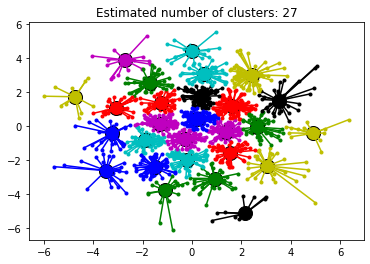

In [10]:
#models with alternative preference parameter
#dataset1
af1_custom_pref = AffinityPropagation(preference = preference1, max_iter = 500).fit(X1)
metrics_and_plots(af1_custom_pref, X1, y1)
#dataset2
af2_custom_pref = AffinityPropagation(preference = preference2, max_iter = 1000).fit(X2)
metrics_and_plots(af2_custom_pref, X2, y2)

Висновок: Ми отримали незначне покращення обох моделей. На першому датасеті кількість кластерів скоротилася з 20 до 7, це покращення також показали дві з трьох метрик якості. На другому датасеті спостерігається менш значне, але такох покращення з 41 до 27 кластерів, але метрики якості відображать покращення моделі досить розпливчато.

# Пошук комбінації оптимальних параметрів моделі за допомогою решітчатого пошуку, ефективність моделі оцінюємо за допомогою метрик якості згідно з варіантом

In [11]:
#function that returns metrics and estimated number of clusters
def evaluate_model(af, X, y_true):
    labels = af.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    return n_clusters_, metrics.adjusted_rand_score(y_true, labels), metrics.adjusted_mutual_info_score(y_true, labels), metrics.silhouette_score(X, labels, metric='sqeuclidean')

In [12]:
affinity = ['euclidean', 'precomputed']
damping = [x/10 for x in range(5, 10)]
preferences1 = [x for x in range(-5, -35, -1)]
preferences2 = [x for x in range(-10, -40, -1)]

In [13]:
def search_best_model(X, y_true, prefs, max_n = 1000):
    af_params = []
    ar_scores = []
    ami_scores = []
    silch_coeffs = []
    estimated_cluster_num = []
    
    
    for affi in affinity:
        for damp in damping:
            for pref in prefs:
                try:
                    af = AffinityPropagation(affinity = affi, damping = damp, preference = pref, max_iter = max_n).fit(X)
                    num_of_clusters, ar_score, ami_score, silch_coef = evaluate_model(af, X, y_true)

                    af_params.append([affi, damp, pref])
                    ar_scores.append(ar_score)
                    ami_scores.append(ami_score)
                    silch_coeffs.append(silch_coef)
                    estimated_cluster_num.append(num_of_clusters)

                except Exception as exc:
                    continue             
    return pd.DataFrame({"params[affi, damp, pref]": af_params,
                         "estimated_cluster_num": estimated_cluster_num,
                         "Adj_rand_scores": ar_scores,
                         "Adj_mut_scores": ami_scores,
                         "Silch_coef": silch_coeffs})

# Dataset1 best model search

In [14]:
#best model for dataset1 search
df1 = search_best_model(X1, y1, preferences1).set_index("params[affi, damp, pref]")
df1_ar = df1.sort_values(['Adj_rand_scores'], ascending = False)
df1_ami = df1.sort_values(['Adj_mut_scores'], ascending = False)
df1_silch = df1.sort_values(['Silch_coef'], ascending = False)

Топ 5 моделей за метрикою Adjusted Rand Score

In [15]:
df1_ar.head()

,estimated_cluster_num,Adj_rand_scores,Adj_mut_scores,Silch_coef
"params[affi, damp, pref]",,,,
"[euclidean, 0.5, -24]",6,0.240795,0.333596,0.467600
"[euclidean, 0.6, -25]",8,0.188441,0.275348,0.478034
"[euclidean, 0.6, -34]",6,0.187795,0.276652,0.456494
"[euclidean, 0.8, -34]",6,0.174773,0.265212,0.478339
"[euclidean, 0.8, -33]",6,0.169822,0.250565,0.480052


Візуалізація кращої моделі за метрикою Adjusted Rand Score:

{'affinity': 'euclidean', 'convergence_iter': 15, 'copy': True, 'damping': 0.8, 'max_iter': 200, 'preference': -34, 'verbose': False}
Estimated number of clusters: 6
Adjusted Rand Index: 0.175
Adjusted Mutual Information: 0.265
Silhouette Coefficient: 0.478


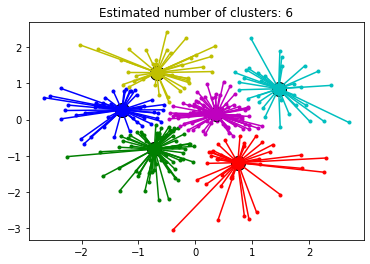

In [16]:
parameters = df1_ar.head().index.values[3]
af1_ar_best = AffinityPropagation(affinity = parameters[0], damping = parameters[1], preference = parameters[2]).fit(X1)
metrics_and_plots(af1_ar_best, X1, y1)

Топ 5 моделей за метрикою Adjusted Mutual Info Score

In [17]:
df1_ami.head()

,estimated_cluster_num,Adj_rand_scores,Adj_mut_scores,Silch_coef
"params[affi, damp, pref]",,,,
"[euclidean, 0.5, -24]",6,0.240795,0.333596,0.467600
"[euclidean, 0.6, -34]",6,0.187795,0.276652,0.456494
"[euclidean, 0.6, -25]",8,0.188441,0.275348,0.478034
"[euclidean, 0.8, -34]",6,0.174773,0.265212,0.478339
"[euclidean, 0.5, -21]",8,0.160427,0.252748,0.467137


Візуалізація кращої моделі за метрикою Adjusted Mutual Info Score

{'affinity': 'euclidean', 'convergence_iter': 15, 'copy': True, 'damping': 0.6, 'max_iter': 200, 'preference': -34, 'verbose': False}
Estimated number of clusters: 6
Adjusted Rand Index: 0.188
Adjusted Mutual Information: 0.277
Silhouette Coefficient: 0.456


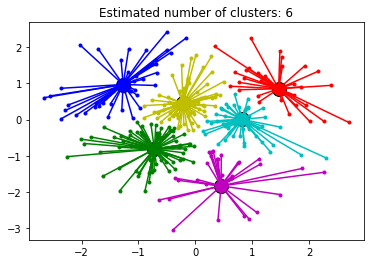

In [18]:
parameters = df1_ami.head().index.values[1]
af1_ami_best = AffinityPropagation(affinity = parameters[0], damping = parameters[1], preference = parameters[2]).fit(X1)
metrics_and_plots(af1_ami_best, X1, y1)

Топ 5 моделей за метрикою Silhouette Coefficient

In [19]:
df1_silch.tail()

,estimated_cluster_num,Adj_rand_scores,Adj_mut_scores,Silch_coef
"params[affi, damp, pref]",,,,
"[euclidean, 0.7, -13]",9,0.082777,0.187573,0.445372
"[euclidean, 0.5, -33]",5,0.042935,0.054278,0.443782
"[euclidean, 0.5, -22]",8,0.091895,0.184021,0.441815
"[euclidean, 0.6, -10]",9,0.095581,0.187575,0.441216
"[euclidean, 0.5, -26]",7,0.125868,0.200457,0.435410


Візуалізація кращої моделі за метрикою Silhouette Coefficient

{'affinity': 'euclidean', 'convergence_iter': 15, 'copy': True, 'damping': 0.7, 'max_iter': 200, 'preference': -13, 'verbose': False}
Estimated number of clusters: 9
Adjusted Rand Index: 0.083
Adjusted Mutual Information: 0.188
Silhouette Coefficient: 0.445


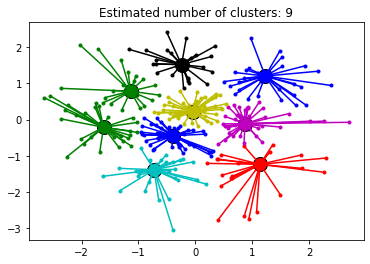

In [20]:
parameters = df1_silch.tail().index.values[0]
af1_silch_best = AffinityPropagation(affinity = parameters[0], damping = parameters[1], preference = parameters[2]).fit(X1)
metrics_and_plots(af1_silch_best, X1, y1)

# Dataset2 best model search

In [21]:
#best model for dataset2 search
df2 = search_best_model(X2, y2, preferences2).set_index("params[affi, damp, pref]")
df2_ar = df2.sort_values(['Adj_rand_scores'], ascending = False)
df2_ami = df2.sort_values(['Adj_mut_scores'], ascending = False)
df2_silch = df2.sort_values(['Silch_coef'], ascending = False)

/home/itsuprun/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:226: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)
/home/itsuprun/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:226: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)
/home/itsuprun/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:226: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)
/home/itsuprun/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:226: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "w

Топ 5 моделей за метрикою Adjusted Rand Score

In [22]:
df2_ar.head()

,estimated_cluster_num,Adj_rand_scores,Adj_mut_scores,Silch_coef
"params[affi, damp, pref]",,,,
"[euclidean, 0.8, -38]",19,0.009974,0.074635,0.480420
"[euclidean, 0.9, -39]",18,0.009684,0.074712,0.475623
"[euclidean, 0.8, -39]",19,0.008545,0.072550,0.473753
"[euclidean, 0.8, -35]",20,0.008046,0.074874,0.472177
"[euclidean, 0.6, -38]",21,0.007998,0.071789,0.480379


Візуалізація кращої моделі за метрикою Adjusted Rand Score:

{'affinity': 'euclidean', 'convergence_iter': 15, 'copy': True, 'damping': 0.8, 'max_iter': 200, 'preference': -38, 'verbose': False}
Estimated number of clusters: 19
Adjusted Rand Index: 0.010
Adjusted Mutual Information: 0.075
Silhouette Coefficient: 0.480


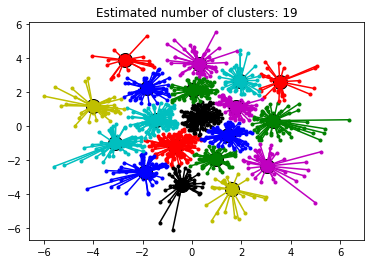

In [23]:
parameters = df2_ar.head().index.values[0]
af2_ar_best = AffinityPropagation(affinity = parameters[0], damping = parameters[1], preference = parameters[2]).fit(X2)
metrics_and_plots(af2_ar_best, X2, y2)

Топ 5 моделей за метрикою Adjusted Mutual Info Score

In [24]:
df2_ami.head()

,estimated_cluster_num,Adj_rand_scores,Adj_mut_scores,Silch_coef
"params[affi, damp, pref]",,,,
"[euclidean, 0.8, -35]",20,0.008046,0.074874,0.472177
"[euclidean, 0.7, -32]",21,0.007837,0.074789,0.468942
"[euclidean, 0.9, -39]",18,0.009684,0.074712,0.475623
"[euclidean, 0.8, -38]",19,0.009974,0.074635,0.480420
"[euclidean, 0.7, -34]",22,0.006046,0.074210,0.469604


Візуалізація кращої моделі за метрикою Adjusted Mutual Info Score

{'affinity': 'euclidean', 'convergence_iter': 15, 'copy': True, 'damping': 0.8, 'max_iter': 200, 'preference': -35, 'verbose': False}
Estimated number of clusters: 20
Adjusted Rand Index: 0.008
Adjusted Mutual Information: 0.075
Silhouette Coefficient: 0.472


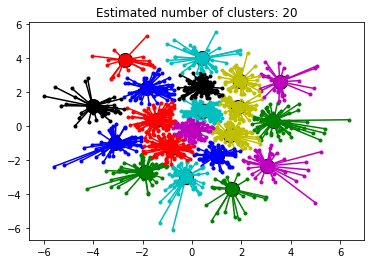

In [25]:
parameters = df2_ami.head().index.values[0]
af2_ami_best = AffinityPropagation(affinity = parameters[0], damping = parameters[1], preference = parameters[2]).fit(X2)
metrics_and_plots(af2_ami_best, X2, y2)

Топ 5 моделей за метрикою Silhouette Coefficient

In [26]:
df2_silch.tail()

,estimated_cluster_num,Adj_rand_scores,Adj_mut_scores,Silch_coef
"params[affi, damp, pref]",,,,
"[euclidean, 0.5, -34]",22,0.007843,0.069550,0.452254
"[euclidean, 0.7, -35]",20,0.005124,0.068380,0.451983
"[euclidean, 0.5, -35]",23,0.005377,0.067298,0.451173
"[euclidean, 0.6, -17]",29,0.004967,0.064594,0.449875
"[euclidean, 0.5, -36]",21,0.007204,0.070359,0.447714


Візуалізація кращої моделі за метрикою Silhouette Coefficient

{'affinity': 'euclidean', 'convergence_iter': 15, 'copy': True, 'damping': 0.7, 'max_iter': 200, 'preference': -35, 'verbose': False}
Estimated number of clusters: 20
Adjusted Rand Index: 0.005
Adjusted Mutual Information: 0.068
Silhouette Coefficient: 0.452


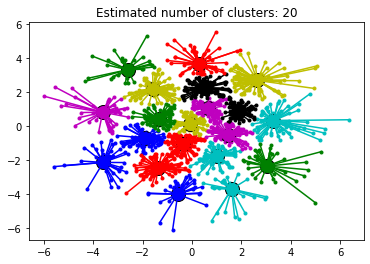

In [27]:
parameters = df2_silch.tail().index.values[1]
af2_silch_best = AffinityPropagation(affinity = parameters[0], damping = parameters[1], preference = parameters[2]).fit(X2)
metrics_and_plots(af2_silch_best, X2, y2)

Висновок: На обох датасетах ми змогли знайти кращі моделі за метриками, але краща метрика не завжди відповідає найменшій кількості кластерів, тому пропоную за кращу модель на кожному з датасетів вибрати ту, де ми змогли отримати наййменшу кількість кластерів. 
За найкращу модель на першому датасеті пропоную вибрати модель, що зменшує кількість кластерів до п'яти с параметрами:
{'affinity': 'euclidean', 'convergence_iter': 15, 'copy': True, 'damping': 0.5, 'max_iter': 200, 'preference': -33, 'verbose': False}
та наступними показниками метрик:
Estimated number of clusters: 5
Adjusted Rand Index: 0.043
Adjusted Mutual Information: 0.054
Silhouette Coefficient: 0.444
За найкращу модель на другому датасеті пропоную вибрати модель, що зменшує кількість кластерів до 18 с параметрами:
{'affinity': 'euclidean', 'convergence_iter': 15, 'copy': True, 'damping': 0.9, 'max_iter': 200, 'preference': -39, 'verbose': False}
та наступними показниками метрик:
Estimated number of clusters: 18
Adjusted Rand Index: 0.009684
Adjusted Mutual Information: 0.074712
Silhouette Coefficient: 0.475623

# 8. Виконати аналіз результатів кластеризації одним із неформальних методів: 

# Чи є розбиття стабiльним пiсля вилучення окремих об’єктiв?

In [28]:
#two copies of best models for every dataset(for full data and for data without some objects)
af1_best1 = AffinityPropagation(affinity = 'euclidean', damping = 0.5, preference = -33, max_iter = 500)
af1_best2 = AffinityPropagation(affinity = 'euclidean', damping = 0.5, preference = -33, max_iter = 500)
af2_best1 = AffinityPropagation(affinity = 'euclidean', damping = 0.9, preference = -39, max_iter = 1000)
af2_best2 = AffinityPropagation(affinity = 'euclidean', damping = 0.9, preference = -39, max_iter = 1000)

Вилучимо 10% об'єктів

In [29]:
X1_10, _, y1_10, _ = train_test_split(X1, y1, test_size = 0.1)
X2_10, _, y2_10, _ = train_test_split(X2, y2, test_size = 0.1)

In [30]:
af1_best1.fit(X1)
af1_best2.fit(X1_10)
af2_best1.fit(X2)
af2_best2.fit(X2_10)

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
                    damping=0.9, max_iter=1000, preference=-39, verbose=False)

Найкраща модель на першому датасеті на повному наборі даних
{'affinity': 'euclidean', 'convergence_iter': 15, 'copy': True, 'damping': 0.5, 'max_iter': 500, 'preference': -33, 'verbose': False}
Estimated number of clusters: 5
Adjusted Rand Index: 0.043
Adjusted Mutual Information: 0.054
Silhouette Coefficient: 0.444


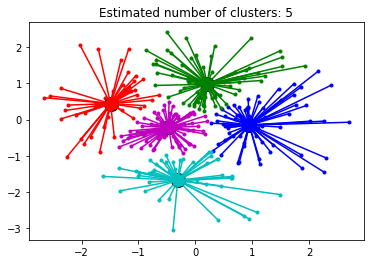

Найкраща модель на першому датасеті на зменшеному на 10% наборі даних
{'affinity': 'euclidean', 'convergence_iter': 15, 'copy': True, 'damping': 0.5, 'max_iter': 500, 'preference': -33, 'verbose': False}
Estimated number of clusters: 6
Adjusted Rand Index: 0.161
Adjusted Mutual Information: 0.223
Silhouette Coefficient: 0.467


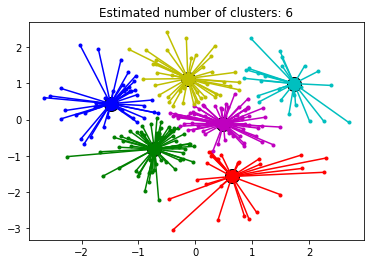

Найкраща модель на другому датасеті при повному наборі даних
{'affinity': 'euclidean', 'convergence_iter': 15, 'copy': True, 'damping': 0.9, 'max_iter': 1000, 'preference': -39, 'verbose': False}
Estimated number of clusters: 18
Adjusted Rand Index: 0.010
Adjusted Mutual Information: 0.075
Silhouette Coefficient: 0.476


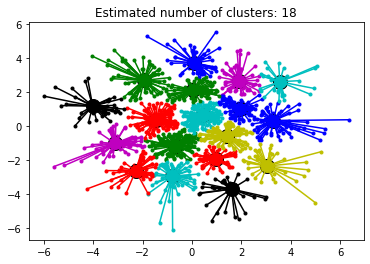

Найкраща модель на другому датасеті при зменшеному 10% наборі даних
{'affinity': 'euclidean', 'convergence_iter': 15, 'copy': True, 'damping': 0.9, 'max_iter': 1000, 'preference': -39, 'verbose': False}
Estimated number of clusters: 18
Adjusted Rand Index: 0.009
Adjusted Mutual Information: 0.073
Silhouette Coefficient: 0.476


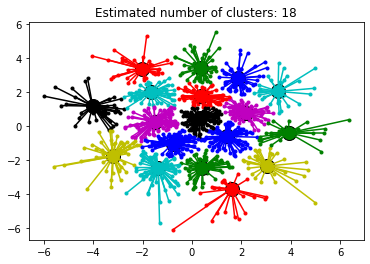

In [31]:
print("Найкраща модель на першому датасеті на повному наборі даних")
metrics_and_plots(af1_best1, X1, y1)

print("Найкраща модель на першому датасеті на зменшеному на 10% наборі даних")
metrics_and_plots(af1_best2, X1_10, y1_10)

print("Найкраща модель на другому датасеті при повному наборі даних")
metrics_and_plots(af2_best1, X2, y2)

print("Найкраща модель на другому датасеті при зменшеному 10% наборі даних")
metrics_and_plots(af2_best2, X2_10, y2_10)

Вилучимо 20% об'єктів

In [32]:
X1_20, _, y1_20, _ = train_test_split(X1, y1, test_size = 0.2)
X2_20, _, y2_20, _ = train_test_split(X2, y2, test_size = 0.2)

In [33]:
af1_best1.fit(X1)
af1_best2.fit(X1_20)
af2_best1.fit(X2)
af2_best2.fit(X2_20)

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
                    damping=0.9, max_iter=1000, preference=-39, verbose=False)

Найкраща модель на першому датасеті на повному наборі даних
{'affinity': 'euclidean', 'convergence_iter': 15, 'copy': True, 'damping': 0.5, 'max_iter': 500, 'preference': -33, 'verbose': False}
Estimated number of clusters: 5
Adjusted Rand Index: 0.043
Adjusted Mutual Information: 0.054
Silhouette Coefficient: 0.444


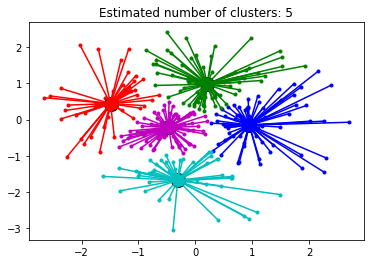

Найкраща модель на першому датасеті на зменшеному нa 20% наборі даних
{'affinity': 'euclidean', 'convergence_iter': 15, 'copy': True, 'damping': 0.5, 'max_iter': 500, 'preference': -33, 'verbose': False}
Estimated number of clusters: 6
Adjusted Rand Index: 0.088
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.464


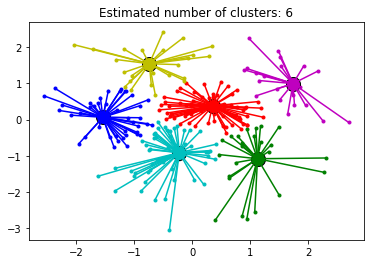

Найкраща модель на другому датасеті при повному наборі даних
{'affinity': 'euclidean', 'convergence_iter': 15, 'copy': True, 'damping': 0.9, 'max_iter': 1000, 'preference': -39, 'verbose': False}
Estimated number of clusters: 18
Adjusted Rand Index: 0.010
Adjusted Mutual Information: 0.075
Silhouette Coefficient: 0.476


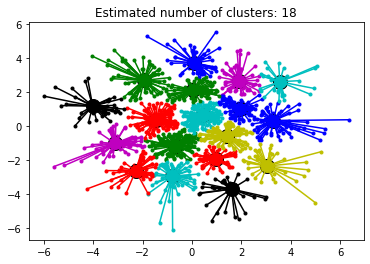

Найкраща модель на другому датасеті при зменшеному 20% наборі даних
{'affinity': 'euclidean', 'convergence_iter': 15, 'copy': True, 'damping': 0.9, 'max_iter': 1000, 'preference': -39, 'verbose': False}
Estimated number of clusters: 18
Adjusted Rand Index: 0.008
Adjusted Mutual Information: 0.062
Silhouette Coefficient: 0.472


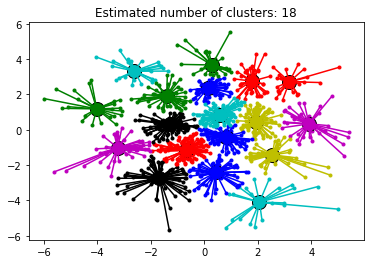

In [34]:
print("Найкраща модель на першому датасеті на повному наборі даних")
metrics_and_plots(af1_best1, X1, y1)

print("Найкраща модель на першому датасеті на зменшеному нa 20% наборі даних")
metrics_and_plots(af1_best2, X1_20, y1_20)

print("Найкраща модель на другому датасеті при повному наборі даних")
metrics_and_plots(af2_best1, X2, y2)

print("Найкраща модель на другому датасеті при зменшеному 20% наборі даних")
metrics_and_plots(af2_best2, X2_20, y2_20)

Вилучимо 30% об'єктів

In [35]:
X1_30, _, y1_30, _ = train_test_split(X1, y1, test_size = 0.3)
X2_30, _, y2_30, _ = train_test_split(X2, y2, test_size = 0.3)

In [36]:
af1_best1.fit(X1)
af1_best2.fit(X1_30)
af2_best1.fit(X2)
af2_best2.fit(X2_30)

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
                    damping=0.9, max_iter=1000, preference=-39, verbose=False)

Найкраща модель на першому датасеті на повному наборі даних
{'affinity': 'euclidean', 'convergence_iter': 15, 'copy': True, 'damping': 0.5, 'max_iter': 500, 'preference': -33, 'verbose': False}
Estimated number of clusters: 5
Adjusted Rand Index: 0.043
Adjusted Mutual Information: 0.054
Silhouette Coefficient: 0.444


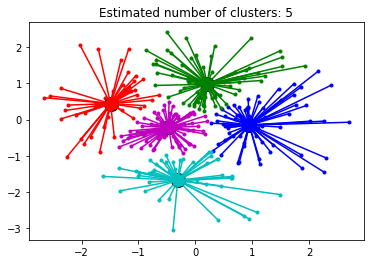

Найкраща модель на першому датасеті на зменшеному на 30% наборі даних
{'affinity': 'euclidean', 'convergence_iter': 15, 'copy': True, 'damping': 0.5, 'max_iter': 500, 'preference': -33, 'verbose': False}
Estimated number of clusters: 6
Adjusted Rand Index: 0.175
Adjusted Mutual Information: 0.227
Silhouette Coefficient: 0.492


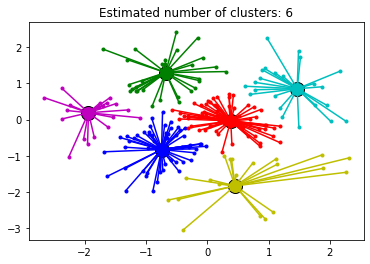

Найкраща модель на другому датасеті при повному наборі даних
{'affinity': 'euclidean', 'convergence_iter': 15, 'copy': True, 'damping': 0.9, 'max_iter': 1000, 'preference': -39, 'verbose': False}
Estimated number of clusters: 18
Adjusted Rand Index: 0.010
Adjusted Mutual Information: 0.075
Silhouette Coefficient: 0.476


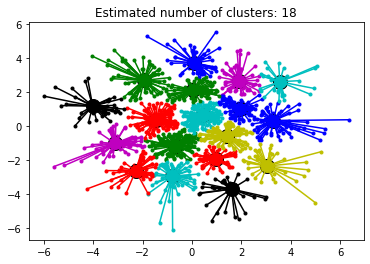

Найкраща модель на другому датасеті при зменшеному 30% наборі даних
{'affinity': 'euclidean', 'convergence_iter': 15, 'copy': True, 'damping': 0.9, 'max_iter': 1000, 'preference': -39, 'verbose': False}
Estimated number of clusters: 17
Adjusted Rand Index: 0.004
Adjusted Mutual Information: 0.061
Silhouette Coefficient: 0.468


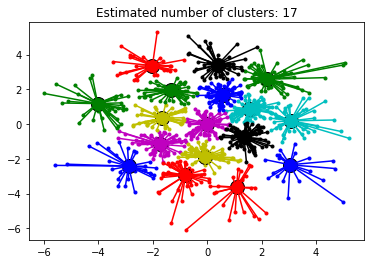

In [37]:
print("Найкраща модель на першому датасеті на повному наборі даних")
metrics_and_plots(af1_best1, X1, y1)

print("Найкраща модель на першому датасеті на зменшеному на 30% наборі даних")
metrics_and_plots(af1_best2, X1_30, y1_30)

print("Найкраща модель на другому датасеті при повному наборі даних")
metrics_and_plots(af2_best1, X2, y2)

print("Найкраща модель на другому датасеті при зменшеному 30% наборі даних")
metrics_and_plots(af2_best2, X2_30, y2_30)

Висновок: 
Можемо спостерігати, що розбиття залишається досить стабільним навіть після видалення до 30% обьєктів. Особливо це стосується другого датасету, де кількість кластерів взагалі скоротилася до 17 псля видалення 30% об'єктів. На першому ж датасеті розбиття не є настільки стабільним, оскільки кількисть кластерів відразу збільшується до 6, проте показники метрик в більшості випадків навіть стають краще.

# 10. Оцініть результати кластеризації на основі метрик якості та на основі неформальних методів. Для кожного набору даних вибрати найкращу модель.

Найкраща модель на першому датасеті:

{'affinity': 'euclidean', 'convergence_iter': 15, 'copy': True, 'damping': 0.5, 'max_iter': 500, 'preference': -33, 'verbose': False}

Найкраща модель на другому датасеті:

{'affinity': 'euclidean', 'convergence_iter': 15, 'copy': True, 'damping': 0.9, 'max_iter': 1000, 'preference': -39, 'verbose': False}

Оцінка результатів:

Алгоритм показує дуже погані результати на другому датасеті, особливо за даними мені за варінтом метриками якості, на мою думку було б доречніше спробувати використання інших метрик, що могли б краще відображати якість моделі. Дещо краще все відбувається на першому датасеті, проте все одно зовсім не завжди модель що має кращу метрику якості має найменшу кількість кластерів. 
Провівши аналіз моделі за допомогою нефольмального методу та дослідивши її на стабільність після вилуження до 30% елементів я був повністю переконаний, що розбиття є стабільним на другому датасеті, проте на першому датасеті, попри покращення метрик якості, кількість кластерів після вилучення 10-30% об'єктів збільшувалася, що не переконало мене у стабільності моделі на першому наборі даних.
